# Plotting colors to help improve the line detection function

⚠️Update: the findings of this notebook have been used to write the function `get_weighted_ratio_blue_pixels` in `line_detection_functions.py`. See the last section of this notebook for more details.

This notebook visualizes different color groups using three color models: RGB (Red, Green, Blue), HSL (Hue, Saturation, Lightness), and HSV (Hue, Saturation, Value). Each model is plotted in separate sections to understand the color component distributions.

The goal is to help in writing a scoring function that returns an accurate probability that there is a line linking `start` and `end` in `image`. Currently, the function used for that purpose is `get_ratio_blue_pixels`.

![0.jpg](../tsp-cv/0.jpg)

### Import libraries

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

### Settings

In [8]:
display_only_shades_of_blue = False

### Define Data and Helper Functions

In [9]:
# Data
groups = {
    'blue*0': [ # blue*0
        (255, 100, 1), (120, 100, 0), (260, 100, 1), (60, 100, 0), (280, 100, 1),
        (120, 100, 0), (240, 100, 0), (240, 33, 1), (0, 0, 0), (120, 33, 2)
    ],
    'blue*1': [ # blue*1
        (211, 74, 35), (210, 85, 32), (210, 83, 31), (210, 80, 31), (210, 78, 35),
        (210, 79, 34), (209, 82, 28), (211, 75, 33), (209, 69, 32), (210, 79, 32)
    ],
    'blue*2': [ # blue*2
        (205, 88, 53), (204, 81, 52), (207, 92, 54), (203, 92, 56), (204, 88, 53),
        (207, 91, 54), (208, 96, 57), (205, 87, 50), (206, 95, 54), (206, 98, 54)
    ],
    'blue*3': [ # blue*3
        (190, 100, 56), (188, 100, 57), (190, 100, 57), (194, 100, 56), (190, 100, 57),
        (191, 100, 56), (191, 100, 57), (189, 100, 57), (193, 95, 56), (189, 100, 56)
    ],
    'blue*4': [ # blue*4
        (182, 100, 53), (182, 100, 54), (182, 100, 55), (183, 100, 54), (183, 100, 54),
        (182, 100, 56), (182, 100, 56), (182, 100, 53), (184, 99, 53), (182, 100, 54)
    ],
    'blue*infty': [ # blue*infty
        (179, 100, 50), (180, 99, 50), (180, 100, 50), (180, 98, 53), (180, 100, 50),
        (180, 100, 50), (181, 100, 50), (180, 100, 50), (180, 96, 55), (180, 100, 50)
    ],
    'yellow': [ # yellow
        (61, 67, 42), (62, 73, 29), (58, 93, 16), (60, 77, 40), (60, 64, 44),
        (62, 89, 24), (59, 61, 51), (59, 67, 45), (60, 70, 44), (55, 100, 11)
    ],
    'yellow + blue*1': [ # yellow + blue*1
        (98, 100, 88), (153, 31, 65), (100, 100, 85), (99, 100, 86), (133, 29, 62),
        (87, 100, 82), (120, 66, 83), (156, 23, 48), (99, 100, 83), (105, 79, 80)
    ]
}

if display_only_shades_of_blue:
    keys_to_keep = ['blue * 1', 'blue * 2', 'blue * 3', 'blue * 4', 'blue * infty']
    groups = {k: v for k, v in groups.items() if k in keys_to_keep}

# Function to convert HSL to RGB
def hsl_to_rgb(h, s, l):
    return mcolors.hsv_to_rgb([h / 360, s / 100, l / 100])

# Function to convert HSL to HSV
def hsl_to_hsv(h, s, l):
    l /= 100
    s /= 100
    v = l + s * min(l, 1 - l)
    s = 2 * (1 - l / v) if v != 0 else 0
    return h / 360, s, v

### Plot RGB

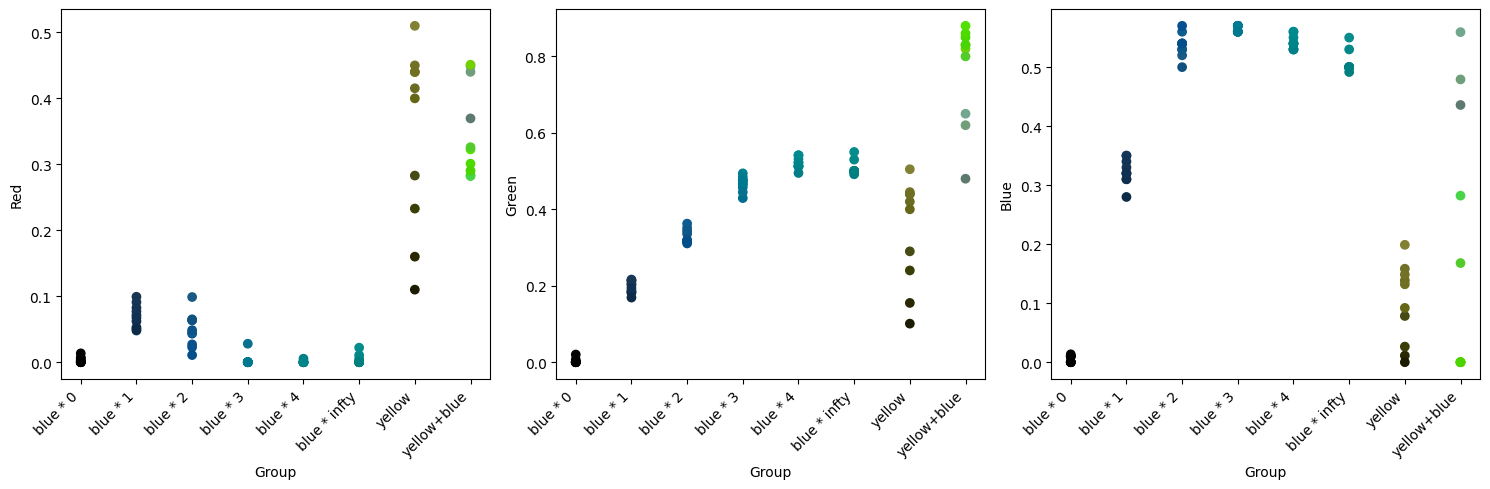

In [10]:
# Create figure for RGB
fig_rgb, axes_rgb = plt.subplots(1, 3, figsize=(15, 5))

# Plotting each RGB component in separate subplots
group_names = list(groups.keys())
for group_name in group_names:
    hsl_values = groups[group_name]
    x = np.full(len(hsl_values), group_names.index(group_name))  # Group index as x-value
    colors = np.array([hsl_to_rgb(h, s, l) for h, s, l in hsl_values])  # Convert HSL to RGB
    r_values = colors[:, 0]  # Red component
    g_values = colors[:, 1]  # Green component
    b_values = colors[:, 2]  # Blue component

    # Plotting Red
    axes_rgb[0].scatter(x, r_values, c=colors)
    # Plotting Green
    axes_rgb[1].scatter(x, g_values, c=colors)
    # Plotting Blue
    axes_rgb[2].scatter(x, b_values, c=colors)

# Setting labels and group names as ticks
axes_rgb[0].set_xlabel('Group')
axes_rgb[0].set_ylabel('Red')
axes_rgb[0].set_xticks(range(len(group_names)))
axes_rgb[0].set_xticklabels(group_names, rotation=45, ha='right')

axes_rgb[1].set_xlabel('Group')
axes_rgb[1].set_ylabel('Green')
axes_rgb[1].set_xticks(range(len(group_names)))
axes_rgb[1].set_xticklabels(group_names, rotation=45, ha='right')

axes_rgb[2].set_xlabel('Group')
axes_rgb[2].set_ylabel('Blue')
axes_rgb[2].set_xticks(range(len(group_names)))
axes_rgb[2].set_xticklabels(group_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Plot HSL

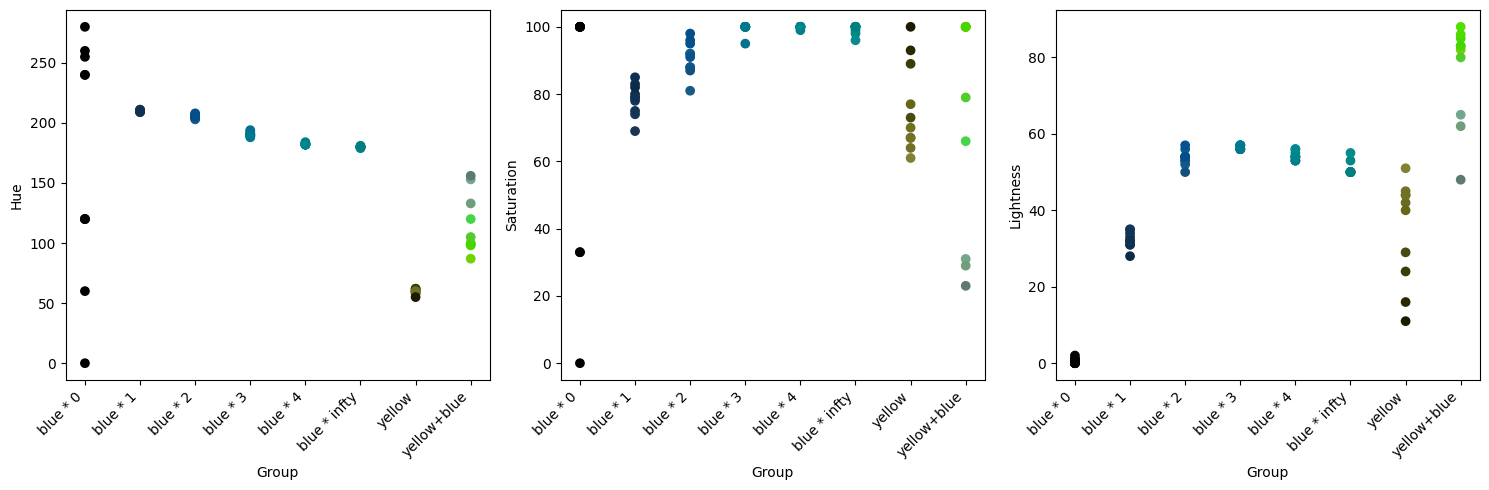

In [11]:
# Create figure for HSL
fig_hsl, axes_hsl = plt.subplots(1, 3, figsize=(15, 5))

# Plotting each HSL component in separate subplots
for group_name in group_names:
    hsl_values = groups[group_name]
    x = np.full(len(hsl_values), group_names.index(group_name))  # Group index as x-value
    hues = np.array([hsl[0] for hsl in hsl_values])  # Hue
    saturations = np.array([hsl[1] for hsl in hsl_values])  # Saturation
    lightnesses = np.array([hsl[2] for hsl in hsl_values])  # Lightness

    # Convert HSL to RGB for colors
    colors = np.array([hsl_to_rgb(h, s, l) for h, s, l in hsl_values])

    # Plotting Hue
    axes_hsl[0].scatter(x, hues, c=colors)
    # Plotting Saturation
    axes_hsl[1].scatter(x, saturations, c=colors)
    # Plotting Lightness
    axes_hsl[2].scatter(x, lightnesses, c=colors)

# Setting labels and group names as ticks
axes_hsl[0].set_xlabel('Group')
axes_hsl[0].set_ylabel('Hue')
axes_hsl[0].set_xticks(range(len(group_names)))
axes_hsl[0].set_xticklabels(group_names, rotation=45, ha='right')

axes_hsl[1].set_xlabel('Group')
axes_hsl[1].set_ylabel('Saturation')
axes_hsl[1].set_xticks(range(len(group_names)))
axes_hsl[1].set_xticklabels(group_names, rotation=45, ha='right')

axes_hsl[2].set_xlabel('Group')
axes_hsl[2].set_ylabel('Lightness')
axes_hsl[2].set_xticks(range(len(group_names)))
axes_hsl[2].set_xticklabels(group_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Plot HSV

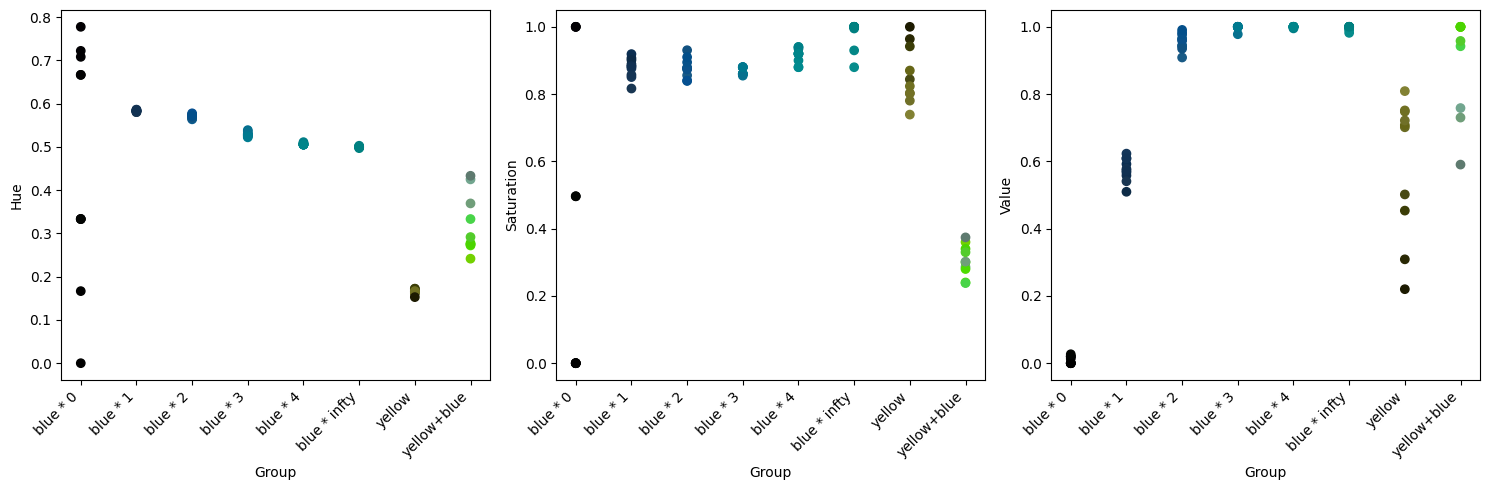

In [12]:
# Create figure for HSV
fig_hsv, axes_hsv = plt.subplots(1, 3, figsize=(15, 5))

# Plotting each HSV component in separate subplots
for group_name in group_names:
    hsl_values = groups[group_name]
    x = np.full(len(hsl_values), group_names.index(group_name))  # Group index as x-value
    hsv_values = np.array([hsl_to_hsv(h, s, l) for h, s, l in hsl_values])  # Convert HSL to HSV
    h_values = hsv_values[:, 0]  # Hue component
    s_values = hsv_values[:, 1]  # Saturation component
    v_values = hsv_values[:, 2]  # Value component

    # Convert HSL to RGB for colors
    colors = np.array([hsl_to_rgb(h, s, l) for h, s, l in hsl_values])

    # Plotting Hue
    axes_hsv[0].scatter(x, h_values, c=colors)
    # Plotting Saturation
    axes_hsv[1].scatter(x, s_values, c=colors)
    # Plotting Value
    axes_hsv[2].scatter(x, v_values, c=colors)

# Setting labels and group names as ticks
axes_hsv[0].set_xlabel('Group')
axes_hsv[0].set_ylabel('Hue')
axes_hsv[0].set_xticks(range(len(group_names)))
axes_hsv[0].set_xticklabels(group_names, rotation=45, ha='right')

axes_hsv[1].set_xlabel('Group')
axes_hsv[1].set_ylabel('Saturation')
axes_hsv[1].set_xticks(range(len(group_names)))
axes_hsv[1].set_xticklabels(group_names, rotation=45, ha='right')

axes_hsv[2].set_xlabel('Group')
axes_hsv[2].set_ylabel('Value')
axes_hsv[2].set_xticks(range(len(group_names)))
axes_hsv[2].set_xticklabels(group_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Notes on writing a scoring function

Filtering only blue pixels:
* HSL:
  * 170 < H < 225
  * L > 20

Returning the number of blue pixels weighted by the number of line overlaps (times a constant):
* RGB:
  * return G